# Uber Data Analysis

#### Import required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Read dataset

In [2]:
df=pd.read_csv('C:/Users/hp/Desktop/UberDataset.csv')

#### First 5 rows of dataset

In [3]:
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


#### Last 5 rows of dataset

In [4]:
df.tail()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site
1154,12/31/2016 22:08,12/31/2016 23:51,Business,Gampaha,Ilukwatta,48.2,Temporary Site
1155,Totals,NaN,NaN,NaN,NaN,12204.7,NaN


#### Dimensions of dataset

In [5]:
df.shape

(1156, 7)

#### Check data types

In [6]:
df.dtypes

START_DATE     object
END_DATE       object
CATEGORY       object
START          object
STOP           object
MILES         float64
PURPOSE        object
dtype: object

#### Check null values

In [7]:
df.isna().sum()

START_DATE      0
END_DATE        1
CATEGORY        1
START           1
STOP            1
MILES           0
PURPOSE       503
dtype: int64

#### So, Observing the result of last 5 rows and checking null values:         the last row of the dataset contains Nan values and 503 values in 'PURPOSE' column are Null

#### Drop last row

In [8]:
df=df.drop(df.index[-1])
df.tail()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
1150,12/31/2016 1:07,12/31/2016 1:14,Business,Kar?chi,Kar?chi,0.7,Meeting
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site
1154,12/31/2016 22:08,12/31/2016 23:51,Business,Gampaha,Ilukwatta,48.2,Temporary Site


#### We will replace null values by mode 


In [9]:
df['PURPOSE']=df['PURPOSE'].fillna(df['PURPOSE'].mode()[0])

#### Re-check for null values

In [10]:
df.isnull().sum()

START_DATE    0
END_DATE      0
CATEGORY      0
START         0
STOP          0
MILES         0
PURPOSE       0
dtype: int64

#### Statistical information of Numerical column

In [11]:
df.describe()

,MILES
count,1155.000000
mean,10.566840
std,21.579106
min,0.500000
25%,2.900000
50%,6.000000
75%,10.400000
max,310.300000


#### Statistical information of Categorical columns

In [12]:
df.describe(include='object')

,START_DATE,END_DATE,CATEGORY,START,STOP,PURPOSE
count,1155,1155,1155,1155,1155,1155
unique,1154,1154,2,177,188,10
top,6/28/2016 23:34,6/28/2016 23:59,Business,Cary,Cary,Meeting
freq,2,2,1078,201,203,689


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1155 entries, 0 to 1154
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   START_DATE  1155 non-null   object 
 1   END_DATE    1155 non-null   object 
 2   CATEGORY    1155 non-null   object 
 3   START       1155 non-null   object 
 4   STOP        1155 non-null   object 
 5   MILES       1155 non-null   float64
 6   PURPOSE     1155 non-null   object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


#### Correct spelling mistake

In [14]:
df['START']=df['START'].replace('Kar?chi','Karachi')
df['STOP']=df['STOP'].replace('Kar?chi','Karachi')

df['START']=df['START'].replace('R?walpindi','Rawalpindi')
df['STOP']=df['STOP'].replace('R?walpindi','Rawalpindi')

In [15]:
df['START'].nunique()

175

In [16]:
df['STOP'].nunique()

186

#### Change data type of 'START_DATE' AND 'END_DATE' to datetime

In [17]:
df['START_DATE']=pd.to_datetime(df['START_DATE'])

In [18]:
df['END_DATE']=pd.to_datetime(df['END_DATE'])

In [19]:
df.dtypes

START_DATE    datetime64[ns]
END_DATE      datetime64[ns]
CATEGORY              object
START                 object
STOP                  object
MILES                float64
PURPOSE               object
dtype: object

#### Seperate time from 'START_DATE' column

#### Extract START_DAY & END_DAY from DATE

In [20]:
df['START_DAY'] = df['START_DATE'].dt.day_name()
df['END_DAY'] = df['END_DATE'].dt.day_name()
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,START_DAY,END_DAY
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,Friday,Friday
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Meeting,Saturday,Saturday
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,Saturday,Saturday
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,Tuesday,Tuesday
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,Wednesday,Wednesday


#### Countplot of Number of rides by day

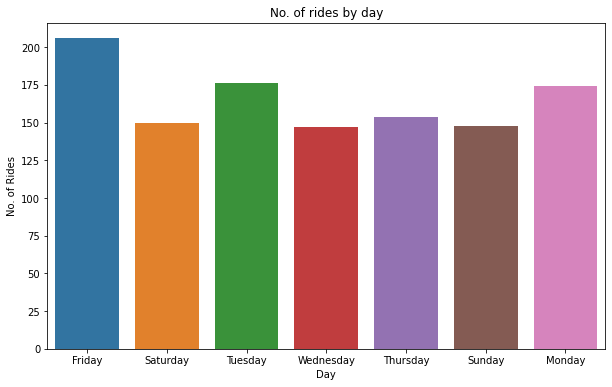

In [21]:
plt.figure(figsize=(10, 6))
sns.countplot(x='START_DAY', data=df)
plt.xlabel('Day')
plt.ylabel('No. of Rides')
plt.title('No. of rides by day')
plt.show()

#### Average of miles by purpose of ride:

In [22]:
avg_miles_by_purpose =df.groupby('PURPOSE')['MILES'].mean()
avg_miles_by_purpose

PURPOSE
Airport/Travel       5.500000
Between Offices     10.944444
Charity ($)         15.100000
Commute            180.200000
Customer Visit      20.688119
Errand/Supplies      3.968750
Meal/Entertain       5.698125
Meeting             11.240639
Moving               4.550000
Temporary Site      10.474000
Name: MILES, dtype: float64

#### Visualization:

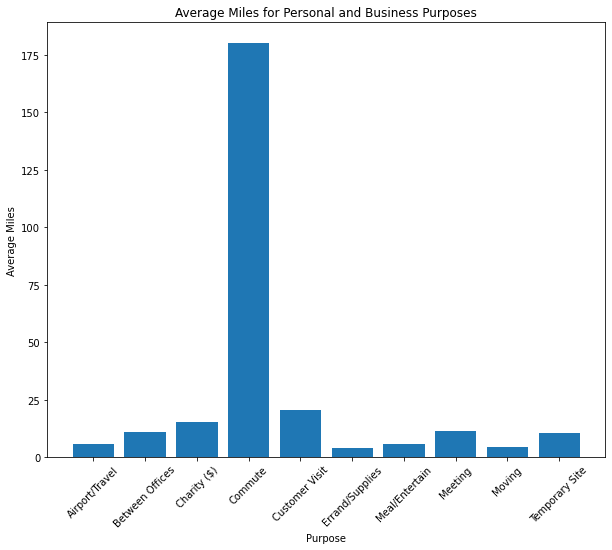

In [23]:
plt.figure(figsize=(10,8))
plt.bar(avg_miles_by_purpose.index, avg_miles_by_purpose.values)
plt.xlabel('Purpose')
plt.ylabel('Average Miles')
plt.title('Average Miles for Personal and Business Purposes')
plt.xticks(rotation=45)
plt.show()

#### Result: Most of the rides are booked to travel from work place to home i.e commute

#### Average of miles by category of rides:

In [24]:
avg_miles_by_category =df.groupby('CATEGORY')['MILES'].mean()
avg_miles_by_category

CATEGORY
Business    10.655844
Personal     9.320779
Name: MILES, dtype: float64

#### Visualization:

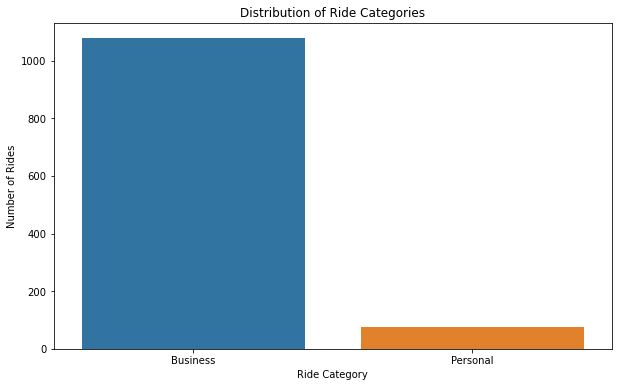

In [25]:
plt.figure(figsize=(10, 6))
sns.countplot(x='CATEGORY', data=df, order=df['CATEGORY'].value_counts().index)
plt.title('Distribution of Ride Categories')
plt.xlabel('Ride Category')
plt.ylabel('Number of Rides')
plt.show()

#### Result: Most of the miles are travelled by business class people

#### Count of rides booked by Top 10 start_points :

In [26]:
top_10_start_points = df['START'].value_counts().nlargest(10)
print("Top 10 Start Points:")
print(top_10_start_points)

Top 10 Start Points:
Cary                201
Unknown Location    148
Morrisville          85
Whitebridge          68
Islamabad            57
Durham               37
Lahore               36
Karachi              31
Raleigh              28
Apex                 17
Name: START, dtype: int64


#### Visualization:

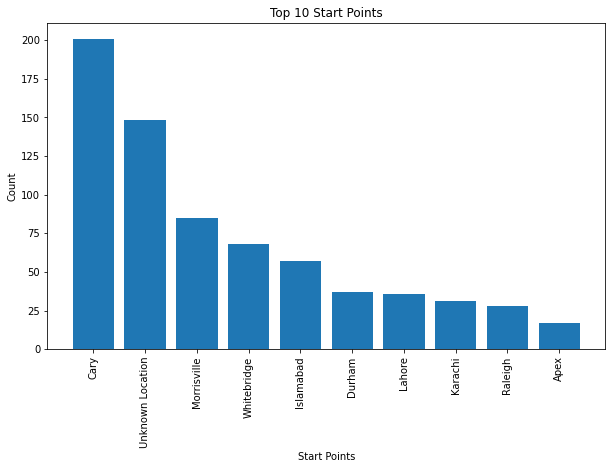

In [27]:
plt.figure(figsize=(10, 6))
plt.bar(top_10_start_points.index, top_10_start_points.values)
plt.xlabel('Start Points')
plt.ylabel('Count')
plt.title('Top 10 Start Points')
plt.xticks(rotation=90)
plt.show()

#### Count of rides booked by Top 10 Stop_points :

In [28]:
top_10_stop_points = df['STOP'].value_counts().nlargest(10)
print("\nTop 10 Stop Points:")
print(top_10_stop_points)


Top 10 Stop Points:
Cary                203
Unknown Location    149
Morrisville          84
Whitebridge          65
Islamabad            58
Lahore               36
Durham               36
Raleigh              29
Karachi              28
Rawalpindi           18
Name: STOP, dtype: int64


#### Visualization:

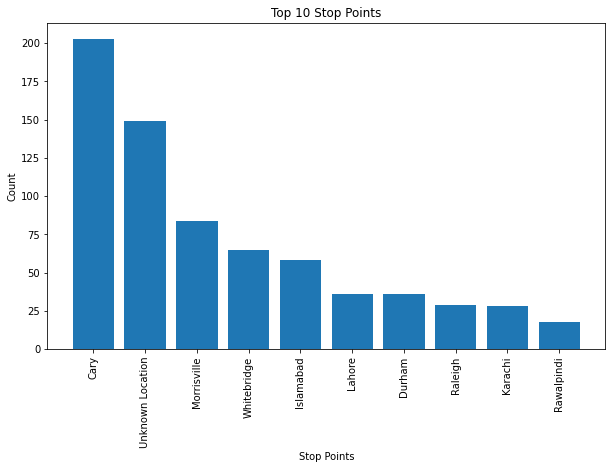

In [29]:
plt.figure(figsize=(10, 6))
plt.bar(top_10_stop_points.index, top_10_stop_points.values)
plt.xlabel('Stop Points')
plt.ylabel('Count')
plt.title('Top 10 Stop Points')
plt.xticks(rotation=90)
plt.show()

#### Count of rides booked by least 10 Start_points :

In [30]:
least_10_start_points = df['START'].value_counts().nsmallest(10)
print("\least 10 Start Points:")
print(least_10_start_points)

\least 10 Start Points:
Parkwood               1
Katunayake             1
Pontchartrain Beach    1
St Thomas              1
Fuquay-Varina          1
Wake Co.               1
College Avenue         1
Eagle Rock             1
Elk Park               1
El Cerrito             1
Name: START, dtype: int64


In [32]:
least_10_stop_points = df['STOP'].value_counts().nsmallest(10)
print("\least 10 Stop Points:")
print(least_10_stop_points)

\least 10 Stop Points:
Fuquay-Varina     1
Marigny           1
Santa Clara       1
Gampaha           1
Elk Park          1
Cory              1
South Berkeley    1
St Thomas         1
Summerwinds       1
Wake Co.          1
Name: STOP, dtype: int64


#### Calculate duration:

In [34]:
df['DURATION_MIN'] = (df['END_DATE'] - df['START_DATE']).dt.total_seconds() / 60
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,START_DAY,END_DAY,DURATION_MIN
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,Friday,Friday,6.0
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Meeting,Saturday,Saturday,12.0
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,Saturday,Saturday,13.0
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,Tuesday,Tuesday,14.0
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,Wednesday,Wednesday,67.0


In [35]:
min_duration=df['DURATION_MIN'].min()
min_duration

0.0

In [36]:
max_duration=df['DURATION_MIN'].max()
max_duration

336.0

In [37]:
avg_duration=df['DURATION_MIN'].mean()
avg_duration

23.243290043290042

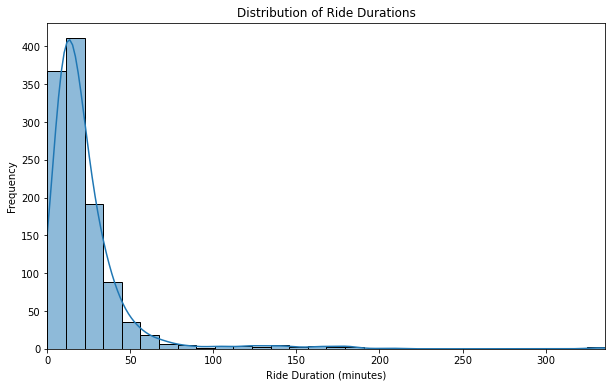

In [39]:
plt.figure(figsize=(10, 6))
sns.histplot(df['DURATION_MIN'], bins=30, kde=True)
plt.title('Distribution of Ride Durations')
plt.xlabel('Ride Duration (minutes)')
plt.ylabel('Frequency')
plt.xlim(0, df['DURATION_MIN'].max())
plt.show()